# Set-up and loading the data

In [1]:
import numpy as np
import pandas as pd
import os
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import fitz

In [2]:
# defining paths for the data sources - refinitiv, nexisuni articles and reports
path_ref = '..\\data\\refinitiv'
path_nexis = '..\\data\\articles'
path_reports = '..\\data\\reports'
path_data = '..\\data_structured'

In [6]:
# Data Loading
df_ref = pd.read_excel(os.path.join(path_ref,'refinitiv.xlsx'), sheet_name = 1)
df_sentiment = pd.read_csv('sentiment_scores.csv') #drop h&m and dhl
df_similarity = pd.read_csv('similarity_overall.csv')
df_verification = pd.read_csv('verification_scores.csv')

In [10]:
# Loading the combined dataset, which holds all the sentences to get the news article sentence count for futher analysis
df_comb = pd.read_pickle(os.path.join(path_data, 'comb.pkl'))

## Creating additional variables for further exploration of the correlation analysis

In [ ]:
# getting a list of low article companies (all the ones for which nexisuni search was necessary) for additional analysis later
low_article_companies = sample = os.listdir(path_nexis)
low_article_companies = [word.split('.')[0] for word in low_article_companies]
low_article_companies

['beiersdorf',
 'colgate',
 'diageo',
 'ford-motor',
 'general-mills',
 'henkel',
 'hershey',
 'inditex',
 'komatsu',
 'linde',
 'mondelez',
 'ralph-lauren',
 'sonoco']

In [11]:
# Getting the article sentence counts per company for a visualization later
df_counts = df_comb[df_comb['doc_type'] == 'news'].groupby(['company'])['sentence'].count() 
df_counts = pd.DataFrame(df_counts)
df_counts.reset_index(inplace = True)
df_counts.rename(columns = {'sentence':'sentence_count'}, inplace = True)
df_counts

,company,sentence_count
0,abb,1172
1,adidas,2120
2,airbus,1949
3,apple,4396
4,bayer,1402
...,...,...
58,toyota,2527
59,veolia,1664
60,volkswagen,1760
61,volvo,2073


In [12]:
df_rep_sentences =  df_comb[df_comb['doc_type'] == 'report'].groupby(['company'])['sentence'].count()
df_rep_sentences = pd.DataFrame(df_rep_sentences)
df_counts = pd.merge(df_counts, df_rep_sentences, left_on = 'company', right_index = True)
df_counts.rename(columns = {'sentence':'rep_sentence_count'}, inplace = True)
df_counts

,company,sentence_count,rep_sentence_count
0,abb,1172,388
1,adidas,2120,307
2,airbus,1949,563
3,apple,4396,1576
4,bayer,1402,884
...,...,...,...
58,toyota,2527,638
59,veolia,1664,350
60,volkswagen,1760,883
61,volvo,2073,697


In [4]:
# df = pd.DataFrame(columns = ['company', 'report_page_count'])

# for filename in os.listdir(path_reports):
#     if filename.endswith('.pdf'):
#         file_path = os.path.join(path_reports, filename)
#         doc = fitz.open(file_path)
#         page_count = doc.page_count
#         doc.close()
#         company_name = filename[:-4]  # remove the ".pdf" extension
#         df_temp = pd.DataFrame({'company': [company_name], 'report_page_count': [page_count]})
#         df = pd.concat([df, df_temp], ignore_index = True)

In [8]:
# Calculate and scale the discrepancy index
df_ref['average_practice'] = df_ref[['resource_use', 'emissions', 'environmental_innovation']].replace(0, np.nan).mean(axis = 1)
df_ref['green_practice'] = StandardScaler().fit_transform(np.array(df_ref['average_practice']).reshape(-1,1))
df_ref['green_communication'] = StandardScaler().fit_transform(np.array(df_ref['CSR_strategy']).reshape(-1,1))
df_ref['discrepancy_index'] = df_ref['green_communication']-df_ref['green_practice']

In [9]:
df_ref['discrepancy_index'] = MinMaxScaler().fit_transform(np.array(df_ref['discrepancy_index']).reshape(-1,1))

In [4]:
df_sample[df_sample['company'] == 'rio-tinto']

,company,resource use,emissions,environmental innovation,strategy
49,rio-tinto,79.17,83.26,50.35,88.54


In [13]:
df_similarity[df_similarity['company'] == 'rio-tinto']

,company,dissimilarity_total,dissimilarity_total_lim,dissimilarity_average_cluster,dissimilarity_waverage_cluster,dissimilarity_wsum_cluster,dissimilarity_average_cluster_lim,dissimilarity_waverage_cluster_lim,dissimilarity_wsum_cluster_lim
44,rio-tinto,0.555139,0.627738,0.826643,0.716184,0.615135,0.78986,0.673234,0.534635


In [5]:
df_sample

,company,resource use,emissions,environmental innovation,strategy
0,abb,62.39,99.39,36.68,62.18
1,adidas,82.77,90.63,80.68,76.89
2,airbus,99.43,97.09,95.92,83.49
3,apple,98.51,97.50,43.51,87.06
4,bayer,70.38,87.91,82.94,95.75
...,...,...,...,...,...
59,veolia,74.49,79.00,84.15,69.16
60,volkswagen,97.25,96.49,92.69,96.07
61,volvo,96.45,88.41,95.18,87.55
62,walmart,77.73,88.08,76.81,87.01


### Preparing the Refinitiv data

In [6]:
df_sample['average_practice'] = df_sample[['resource use', 'emissions', 'environmental innovation']].replace(0, np.nan).mean(axis = 1)

In [7]:
df_sample['green_practice'] = StandardScaler().fit_transform(np.array(df_sample['average_practice']).reshape(-1,1))
df_sample['green_communication'] = StandardScaler().fit_transform(np.array(df_sample['strategy']).reshape(-1,1))
df_sample['discrepancy_index'] = df_sample['green_communication']-df_sample['green_practice']

In [8]:
df_sample['discrepancy_index'] = MinMaxScaler().fit_transform(np.array(df_sample['discrepancy_index']).reshape(-1,1))

In [9]:
df_sample

,company,resource use,emissions,environmental innovation,strategy,average_practice,green_practice,green_communication,discrepancy_index
0,abb,62.39,99.39,36.68,62.18,66.153333,-1.251297,-1.692492,0.481721
1,adidas,82.77,90.63,80.68,76.89,84.693333,0.283825,-0.653553,0.414026
2,airbus,99.43,97.09,95.92,83.49,97.480000,1.342568,-0.187407,0.333176
3,apple,98.51,97.50,43.51,87.06,79.840000,-0.118034,0.064735,0.566850
4,bayer,70.38,87.91,82.94,95.75,80.410000,-0.070838,0.678493,0.644148
...,...,...,...,...,...,...,...,...,...
59,veolia,74.49,79.00,84.15,69.16,79.213333,-0.169922,-1.199508,0.401446
60,volkswagen,97.25,96.49,92.69,96.07,95.476667,1.176690,0.701094,0.477028
61,volvo,96.45,88.41,95.18,87.55,93.346667,1.000325,0.099343,0.418991
62,walmart,77.73,88.08,76.81,87.01,80.873333,-0.032473,0.061204,0.554695


In [14]:
#df_linreg = df_sample[['company','discrepancy_index']]
df_linreg = df_ref[['company','discrepancy_index']]
df_linreg

,company,discrepancy_index
0,abb,0.208493
1,adidas,0.420188
2,airbus,0.184646
3,google,0.581205
4,apple,0.602864
...,...,...
58,toyota,0.103243
59,veolia,0.412712
60,volkswagen,0.279706
61,volvo,0.469956


In [15]:
df_linreg = pd.merge(df_linreg, df_similarity, how = 'left')
df_linreg = pd.merge(df_linreg, df_sentiment)
df_linreg = pd.merge(df_linreg, df_verification)
df_linreg = pd.merge(df_linreg, df_counts)

In [16]:
df_linreg

,company,discrepancy_index,dissimilarity_total,dissimilarity_total_lim,dissimilarity_average_cluster,dissimilarity_waverage_cluster,dissimilarity_wsum_cluster,dissimilarity_average_cluster_lim,dissimilarity_waverage_cluster_lim,dissimilarity_wsum_cluster_lim,...,clim_sentiment_cluster_average_lim,clim_sentiment_cluster_waverage_lim,clim_sentiment_cluster_wsum_lim,sentiment_cluster_average_lim,verification_score,verification_score_lim,verification_cluster,verification_cluster_lim,sentence_count,rep_sentence_count
0,abb,0.208493,0.394642,0.395509,0.458221,0.619573,0.462104,0.418272,0.621324,0.451725,...,-0.022790,-0.001798,-0.014381,0.024637,0.818533,0.901786,0.944552,0.987343,1172,388
1,adidas,0.420188,0.669004,0.645366,0.745420,0.371327,0.351877,0.730806,0.330754,0.320529,...,-0.207970,-0.030220,-0.211537,0.104891,0.673692,0.793750,0.922131,0.964139,2120,307
2,airbus,0.184646,0.577540,0.763859,0.904083,0.918818,0.527802,0.740525,0.758115,0.422630,...,0.020253,-0.014188,-0.127690,0.004320,0.461097,0.290323,0.919706,0.929742,1949,563
3,google,0.581205,0.316972,0.256278,0.177176,0.379424,0.363536,0.130861,0.424026,0.450880,...,-0.013998,-0.006708,-0.046957,0.106857,0.780447,0.753731,0.900646,0.895678,4865,139
4,apple,0.602864,0.446004,0.514624,0.430209,0.949415,0.585078,0.439572,0.818964,0.531965,...,0.121607,0.003739,0.033651,0.217470,0.000000,0.039101,0.456722,0.520234,4396,1576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,toyota,0.103243,0.552252,0.573039,0.539913,0.787011,0.504193,0.523176,0.760765,0.427391,...,-0.098281,-0.000623,-0.005607,0.051256,0.756387,0.734940,0.933575,0.941878,2527,638
59,veolia,0.412712,0.371148,0.520925,0.460262,0.747798,0.436433,0.321163,0.717563,0.349765,...,0.056463,0.004627,0.041646,0.085833,1.000000,1.000000,1.000000,1.000000,1664,350
60,volkswagen,0.279706,0.671546,0.760529,0.742698,0.784993,0.724128,0.715468,0.724936,0.617212,...,-0.110589,-0.007784,-0.062269,0.005641,0.778625,0.744845,0.957234,0.962580,1760,883
61,volvo,0.469956,0.444000,0.506159,0.525119,0.634637,0.485966,0.468848,0.611082,0.435366,...,-0.054440,-0.000012,-0.000097,0.102913,0.166385,0.000000,0.848840,0.854508,2073,697


In [61]:
test = ['hershey', 'general-mills']
df_linreg = df_linreg[-df_linreg['company'].isin(test)]


In [17]:
df_correlation_scores = pd.DataFrame(columns = ['discrepancy_measure', 'correlation', 'p-value'])

In [18]:
from scipy.stats import pearsonr, ttest_1samp

In [19]:
for column in df_linreg.columns[2:]:
    df_linreg[column] = MinMaxScaler().fit_transform(np.array(df_linreg[column]).reshape(-1,1))
    
df_linreg['clim_sentiment_overall']

0     0.487365
1     0.292901
2     0.368725
3     0.752238
4     0.804512
        ...   
58    0.631427
59    0.636440
60    0.599609
61    0.584237
62    0.651766
Name: clim_sentiment_overall, Length: 63, dtype: float64

In [20]:
x = df_linreg['discrepancy_index']
for column in df_linreg.columns[2:]:
    y = df_linreg[column]
    correlation, p_value = pearsonr(x,y)
    temp_df = pd.DataFrame(
        {
            'discrepancy_measure':[column], 
            'correlation':[correlation],
            'p-value':[p_value]
        }
    )
    df_correlation_scores = pd.concat([df_correlation_scores, temp_df], ignore_index = True)
    

In [21]:
df_correlation_scores
# correlation scores when leaving out beiersdorf, hershey and henkel, which are companies for which I also included articles from 2020

,discrepancy_measure,correlation,p-value
0,dissimilarity_total,-0.192585,0.130489
1,dissimilarity_total_lim,-0.299210,0.017209
2,dissimilarity_average_cluster,-0.184864,0.146929
3,dissimilarity_waverage_cluster,-0.326138,0.009093
4,dissimilarity_wsum_cluster,-0.266865,0.034492
5,dissimilarity_average_cluster_lim,-0.115190,0.368664
6,dissimilarity_waverage_cluster_lim,-0.167465,0.189561
7,dissimilarity_wsum_cluster_lim,-0.182332,0.152643
8,sentiment_overall,0.198504,0.118856
9,sentiment_cluster_average,0.176875,0.165517


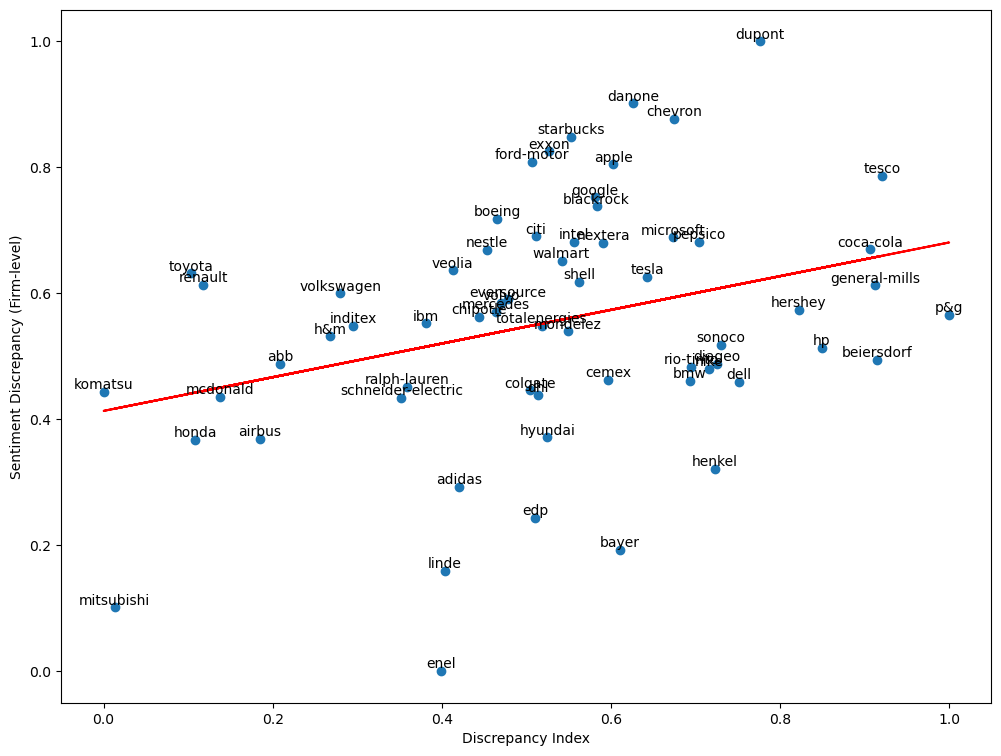

In [25]:
df_linreg.reset_index(drop = True, inplace = True)
x = df_linreg['discrepancy_index']
y = df_linreg['clim_sentiment_overall']
companies = df_linreg['company']

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)

# Scatter plot
plt.figure(figsize=(12,9))
plt.scatter(x, y)

# Add the linear regression line
plt.plot(x, line(x), color='red', label = 'Our Correlation')

# Add labels for each point
for i, company in enumerate(companies):
    plt.text(x[i], y[i], company, ha='center', va='bottom')
    
plt.xlabel('Discrepancy Index')
plt.ylabel('Sentiment Discrepancy (Firm-level)')

plt.savefig('correlationscatterplot.png', dpi = 200)

plt.show()

In [148]:
def high_coverage(row):
    if (row['sentence_count'] > df_linreg['sentence_count'].median()):
        return 'Top 50%'
    else:
        return 'Bottom 50%'

df_linreg['high_coverage'] = df_linreg.apply(high_coverage, axis = 1)

In [149]:
df_descriptives = df_ref[['company','country','industry']]
df_linreg = pd.merge(df_linreg, df_descriptives)

In [122]:
df_linreg['english_speaking'] = df_linreg['country'].apply(lambda x: 'Yes' if x in ['United Kingdom', 'Australia', 'United States of America'] else 'No')
# 'United Kingdom', 'Australia', 

In [150]:
df_linreg['low_coverage'] = df_linreg['company'].apply(lambda x: 'Yes' if x in low_article_companies else 'No')

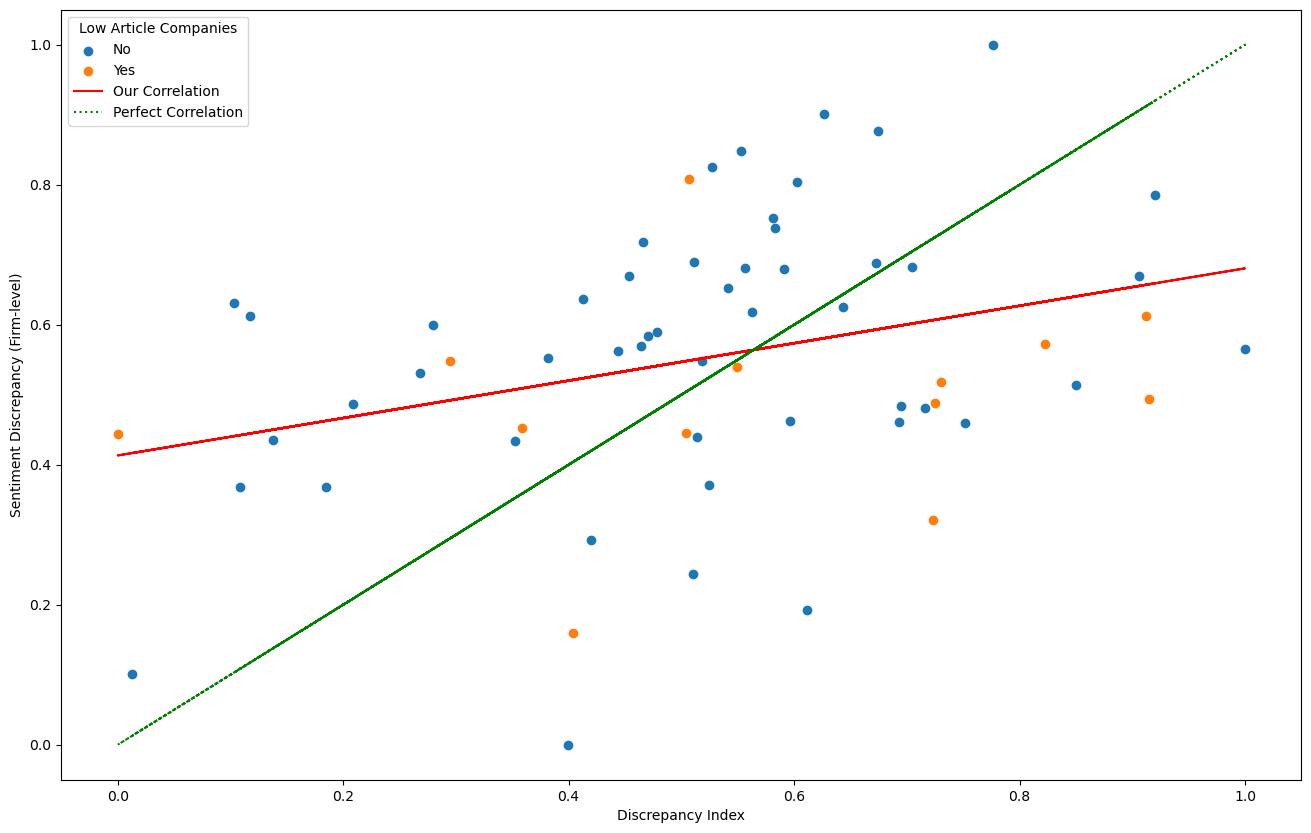

In [161]:
df_linreg.reset_index(drop=True, inplace=True)
x = df_linreg['discrepancy_index']
y = df_linreg['clim_sentiment_overall']
companies = df_linreg['company']
countries = df_linreg['low_coverage']

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)

# Scatter plot with color coding by industry
plt.figure(figsize=(16, 10))
for country in set(countries):
    plt.scatter(x[countries == country], y[countries == country], label=country)

# Add the linear regression line
plt.plot(x, line(x), color='red', label = 'Our Correlation')

plt.plot(x, x, color='green', linestyle='dotted', solid_capstyle='butt', label='Perfect Correlation')


# Add labels for each point
# for i, company in enumerate(companies):
#     plt.text(x[i], y[i], company, ha='center', va='bottom')

plt.xlabel('Discrepancy Index')
plt.ylabel('Sentiment Discrepancy (Firm-level)')

# Add legend
plt.legend(title='Low Article Companies')

#plt.savefig('correlationscatterplot-low articles.png', dpi=500)

plt.show()

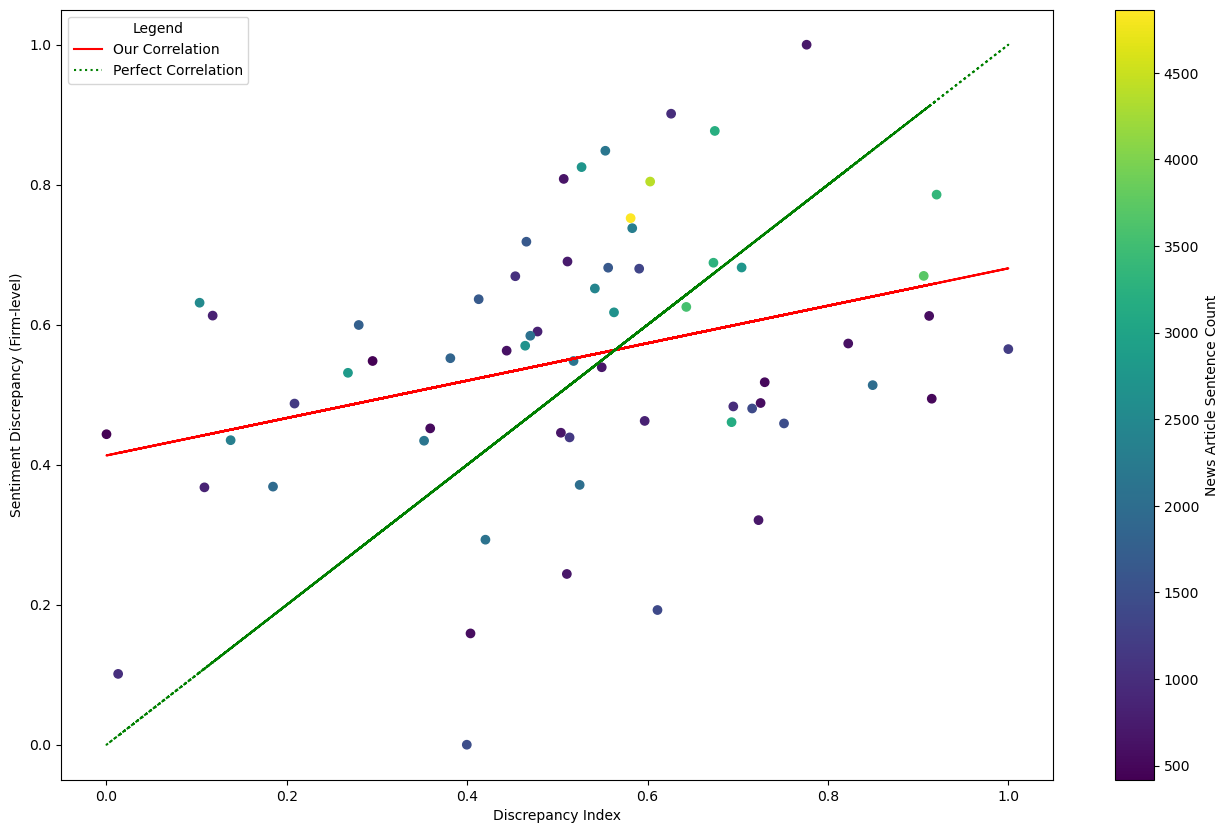

In [62]:
df_linreg.reset_index(drop=True, inplace=True)
x = df_linreg['discrepancy_index']
y = df_linreg['clim_sentiment_overall']
companies = df_linreg['company']
#coverages = df_linreg['high_coverage']

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)

# Scatter plot with color coding by industry
plt.figure(figsize=(16, 10))
#for coverage in set(coverages):
    #plt.scatter(x[coverages == coverage], y[coverages == coverage], label=coverage)
plt.scatter(x,y,c = df_linreg['sentence_count'], cmap = 'viridis')
plt.colorbar(label='News Article Sentence Count')


# Add the linear regression line
plt.plot(x, line(x), color='red', label = 'Our Correlation')

plt.plot(x, x, color='green', linestyle='dotted', solid_capstyle='butt', label='Perfect Correlation')

# # Add labels for each point
# for i, company in enumerate(companies):
#     plt.text(x[i], y[i], company, ha='center', va='bottom')

plt.xlabel('Discrepancy Index')
plt.ylabel('Sentiment Discrepancy (Firm-level)')

# Add legend
plt.legend(title='Legend')

#plt.savefig('corr_scatter_news_coverage.png', dpi=500)

plt.show()

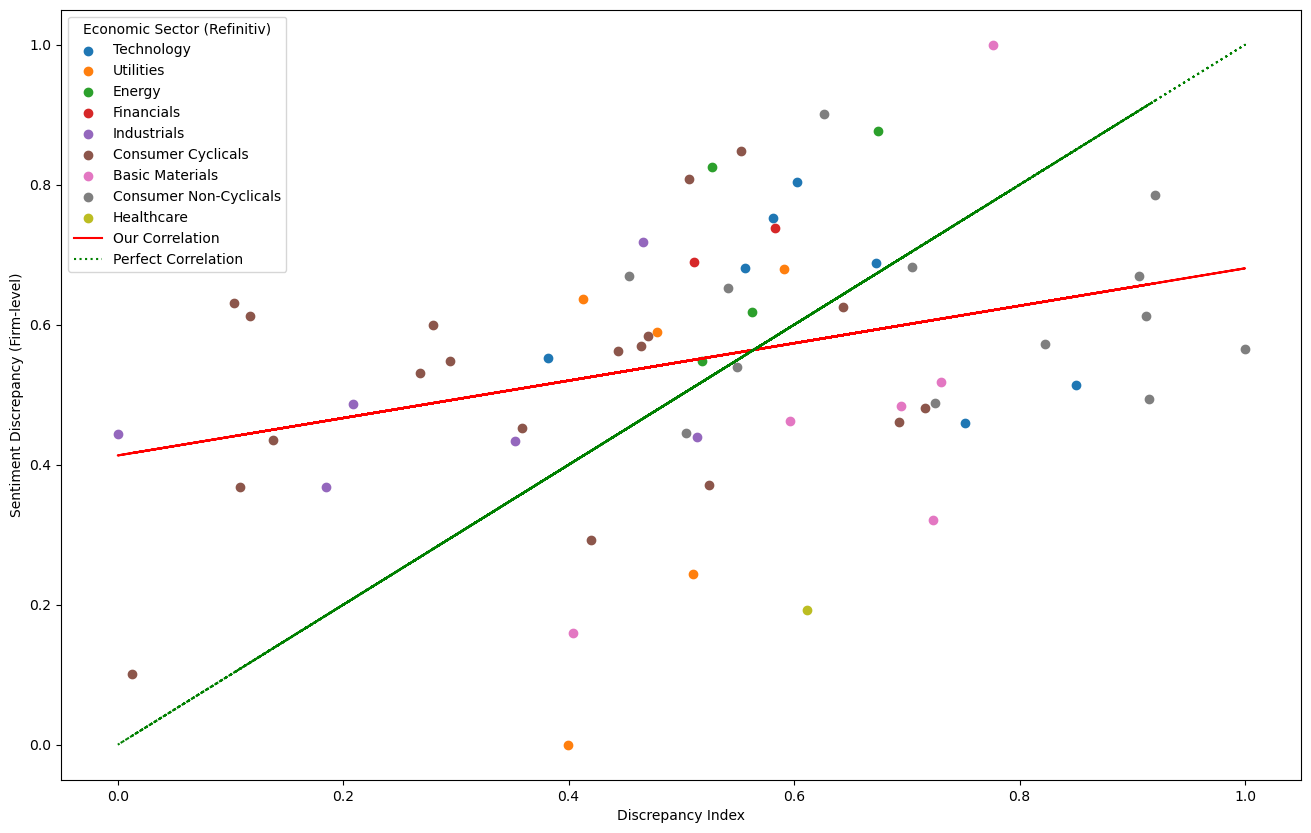

In [164]:
df_linreg.reset_index(drop=True, inplace=True)
x = df_linreg['discrepancy_index']
y = df_linreg['clim_sentiment_overall']
companies = df_linreg['company']
industries = df_linreg['industry']

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)

# Scatter plot with color coding by industry
plt.figure(figsize=(16, 10))
for industry in set(industries):
    plt.scatter(x[industries == industry], y[industries == industry], label=industry)

# Add the linear regression line
plt.plot(x, line(x), color='red', label = 'Our Correlation')

plt.plot(x, x, color='green', linestyle='dotted', solid_capstyle='butt', label='Perfect Correlation')

# # Add labels for each point
# for i, company in enumerate(companies):
#     plt.text(x[i], y[i], company, ha='center', va='bottom')

plt.xlabel('Discrepancy Index')
plt.ylabel('Sentiment Discrepancy (Firm-level)')

# Add legend
plt.legend(title='Economic Sector (Refinitiv)')

#plt.savefig('corr_scatter_sector.png', dpi=500)

plt.show()

In [58]:
df_linreg = pd.merge(df_linreg, df)
df_linreg

,company,discrepancy_index,dissimilarity_total,dissimilarity_total_lim,dissimilarity_average_cluster,dissimilarity_waverage_cluster,dissimilarity_wsum_cluster,dissimilarity_average_cluster_lim,dissimilarity_waverage_cluster_lim,dissimilarity_wsum_cluster_lim,...,clim_sentiment_cluster_waverage_lim,clim_sentiment_cluster_wsum_lim,sentiment_cluster_average_lim,verification_score,verification_score_lim,verification_cluster,verification_cluster_lim,sentence_count,rep_sentence_count,report_page_count
0,abb,0.208493,0.394642,0.395509,0.458221,0.619573,0.462104,0.418272,0.621324,0.451725,...,0.629388,0.642525,0.520656,0.818533,0.901786,0.944552,0.987343,1172,388,33
1,adidas,0.420188,0.669004,0.645366,0.745420,0.371327,0.351877,0.730806,0.330754,0.320529,...,0.247585,0.323201,0.655463,0.673692,0.793750,0.922131,0.964139,2120,307,17
2,airbus,0.184646,0.577540,0.763859,0.904083,0.918818,0.527802,0.740525,0.758115,0.422630,...,0.462946,0.459004,0.486528,0.461097,0.290323,0.919706,0.929742,1949,563,22
3,google,0.581205,0.316972,0.256278,0.177176,0.379424,0.363536,0.130861,0.424026,0.450880,...,0.563424,0.589764,0.658764,0.780447,0.753731,0.900646,0.895678,4865,139,10
4,apple,0.602864,0.446004,0.514624,0.430209,0.949415,0.585078,0.439572,0.818964,0.531965,...,0.703764,0.720321,0.844568,0.000000,0.039101,0.456722,0.520234,4396,1576,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,toyota,0.103243,0.552252,0.573039,0.539913,0.787011,0.504193,0.523176,0.760765,0.427391,...,0.645167,0.656735,0.565368,0.756387,0.734940,0.933575,0.941878,2527,638,28
59,veolia,0.412712,0.371148,0.520925,0.460262,0.747798,0.436433,0.321163,0.717563,0.349765,...,0.715697,0.733269,0.623450,1.000000,1.000000,1.000000,1.000000,1664,350,16
60,volkswagen,0.279706,0.671546,0.760529,0.742698,0.784993,0.724128,0.715468,0.724936,0.617212,...,0.548977,0.564964,0.488746,0.778625,0.744845,0.957234,0.962580,1760,883,33
61,volvo,0.469956,0.444000,0.506159,0.525119,0.634637,0.485966,0.468848,0.611082,0.435366,...,0.653373,0.665660,0.652140,0.166385,0.000000,0.848840,0.854508,2073,697,29


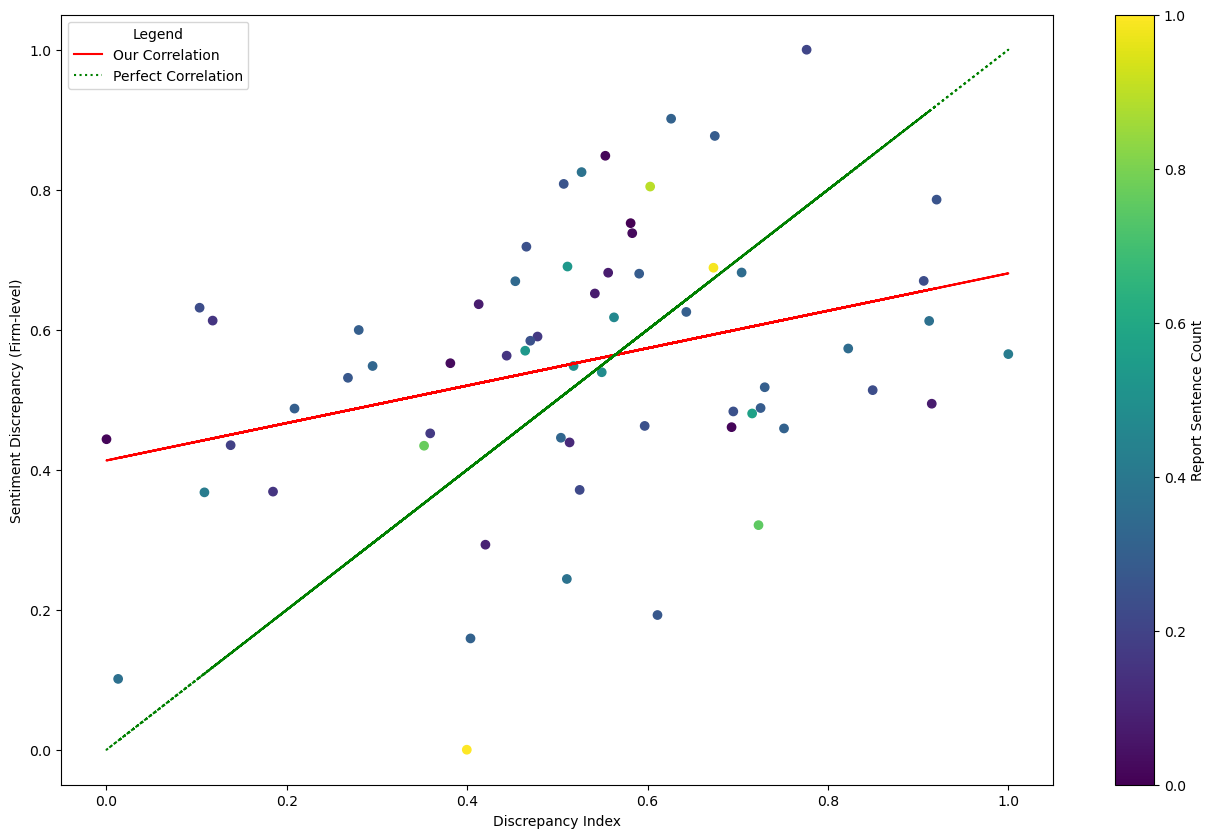

In [72]:
df_linreg.reset_index(drop=True, inplace=True)
x = df_linreg['discrepancy_index']
y = df_linreg['clim_sentiment_overall']
companies = df_linreg['company']
#coverages = df_linreg['high_coverage']

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)

# Scatter plot with color coding by industry
plt.figure(figsize=(16, 10))
#for coverage in set(coverages):
    #plt.scatter(x[coverages == coverage], y[coverages == coverage], label=coverage)
plt.scatter(x,y,c = df_linreg['report_page_count'], cmap = 'viridis')
plt.colorbar(label='Report Sentence Count')


# Add the linear regression line
plt.plot(x, line(x), color='red', label = 'Our Correlation')

plt.plot(x, x, color='green', linestyle='dotted', solid_capstyle='butt', label='Perfect Correlation')

# # Add labels for each point
# for i, company in enumerate(companies):
#     plt.text(x[i], y[i], company, ha='center', va='bottom')

plt.xlabel('Discrepancy Index')
plt.ylabel('Sentiment Discrepancy (Firm-level)')

# Add legend
plt.legend(title='Legend')

#plt.savefig('corr_scatter_page_count.png', dpi=500)

plt.show()

In [68]:
# from first glance I would say that companies with higher coverage (i.e. startbucks, apple, google, nestle) have a higher sentiment discrepancy
df_linreg['sentence_diff'] = abs(df_linreg['sentence_count'] - df_linreg['rep_sentence_count'])

In [60]:
df_linreg

,company,discrepancy_index,dissimilarity_total,dissimilarity_total_lim,dissimilarity_average_cluster,dissimilarity_waverage_cluster,dissimilarity_wsum_cluster,dissimilarity_average_cluster_lim,dissimilarity_waverage_cluster_lim,dissimilarity_wsum_cluster_lim,...,clim_sentiment_cluster_wsum_lim,sentiment_cluster_average_lim,verification_score,verification_score_lim,verification_cluster,verification_cluster_lim,sentence_count,rep_sentence_count,report_page_count,sentence_diff
0,abb,0.208493,0.394642,0.395509,0.458221,0.619573,0.462104,0.418272,0.621324,0.451725,...,0.642525,0.520656,0.818533,0.901786,0.944552,0.987343,1172,388,33,784
1,adidas,0.420188,0.669004,0.645366,0.745420,0.371327,0.351877,0.730806,0.330754,0.320529,...,0.323201,0.655463,0.673692,0.793750,0.922131,0.964139,2120,307,17,1813
2,airbus,0.184646,0.577540,0.763859,0.904083,0.918818,0.527802,0.740525,0.758115,0.422630,...,0.459004,0.486528,0.461097,0.290323,0.919706,0.929742,1949,563,22,1386
3,google,0.581205,0.316972,0.256278,0.177176,0.379424,0.363536,0.130861,0.424026,0.450880,...,0.589764,0.658764,0.780447,0.753731,0.900646,0.895678,4865,139,10,4726
4,apple,0.602864,0.446004,0.514624,0.430209,0.949415,0.585078,0.439572,0.818964,0.531965,...,0.720321,0.844568,0.000000,0.039101,0.456722,0.520234,4396,1576,79,2820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,toyota,0.103243,0.552252,0.573039,0.539913,0.787011,0.504193,0.523176,0.760765,0.427391,...,0.656735,0.565368,0.756387,0.734940,0.933575,0.941878,2527,638,28,1889
59,veolia,0.412712,0.371148,0.520925,0.460262,0.747798,0.436433,0.321163,0.717563,0.349765,...,0.733269,0.623450,1.000000,1.000000,1.000000,1.000000,1664,350,16,1314
60,volkswagen,0.279706,0.671546,0.760529,0.742698,0.784993,0.724128,0.715468,0.724936,0.617212,...,0.564964,0.488746,0.778625,0.744845,0.957234,0.962580,1760,883,33,877
61,volvo,0.469956,0.444000,0.506159,0.525119,0.634637,0.485966,0.468848,0.611082,0.435366,...,0.665660,0.652140,0.166385,0.000000,0.848840,0.854508,2073,697,29,1376


In [73]:
df_finbert_results = df_correlation_scores.iloc[[8,9,12,13]]
df_finbert_results
print(df_finbert_results.to_latex(index = False, caption = 'Comparison of the Performance of a Domain-Trained (ClimateBERT) and Non-Domain Trained sentiment model (FinBERT)', label = 'tab:sentimentcomparison', header = True, position = 'h'))

\begin{table}[h]
\centering
\caption{Comparison of the Performance of a Domain-Trained (ClimateBERT) and Non-Domain Trained sentiment model (FinBERT)}
\label{tab:sentimentcomparison}
\begin{tabular}{lrr}
\toprule
              discrepancy\_measure &  correlation &  p-value \\
\midrule
                sentiment\_overall &     0.198504 & 0.118856 \\
        sentiment\_cluster\_average &     0.176875 & 0.165517 \\
           clim\_sentiment\_overall &     0.319614 & 0.010667 \\
climate\_sentiment\_cluster\_average &     0.238477 & 0.059808 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\dathn\AppData\Local\Temp\ipykernel_32396\3124484941.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_finbert_results.to_latex(index = False, caption = 'Comparison of the Performance of a Domain-Trained (ClimateBERT) and Non-Domain Trained sentiment model (FinBERT)', label = 'tab:sentimentcomparison', header = True, position = 'h'))


In [76]:
filter_results = []
for measure in df_correlation_scores['discrepancy_measure']:
    if ('_lim' in measure)|('waverage' in measure)|('wsum' in measure):
        filter_results.append(False)
    else:
        filter_results.append(True)
df_results = df_correlation_scores[filter_results]
df_results.reset_index(inplace = True, drop = True)
df_results

,discrepancy_measure,correlation,p-value
0,dissimilarity_total,-0.192585,0.130489
1,dissimilarity_average_cluster,-0.184864,0.146929
2,sentiment_overall,0.198504,0.118856
3,sentiment_cluster_average,0.176875,0.165517
4,clim_sentiment_overall,0.319614,0.010667
5,climate_sentiment_cluster_average,0.238477,0.059808
6,verification_score,0.023463,0.855168
7,verification_cluster,-0.038120,0.766760
8,sentence_count,0.124495,0.330978
9,rep_sentence_count,-0.036623,0.775675


In [77]:
df_results = df_results.iloc[[0,1,4,5,6,7]]
df_results.reset_index(inplace = True, drop = True)

In [78]:
df_results['discrepancy_measure'] = ['Dissimilarity_firm', 'Dissimilarity_firm-topic', 'Sentiment_firm', 'Sentiment_firm-topic', 'Verification_firm', 'Verification_firm-topic']
df_results

C:\Users\dathn\AppData\Local\Temp\ipykernel_32396\1483800314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['discrepancy_measure'] = ['Dissimilarity_firm', 'Dissimilarity_firm-topic', 'Sentiment_firm', 'Sentiment_firm-topic', 'Verification_firm', 'Verification_firm-topic']


,discrepancy_measure,correlation,p-value
0,Dissimilarity_firm,-0.192585,0.130489
1,Dissimilarity_firm-topic,-0.184864,0.146929
2,Sentiment_firm,0.319614,0.010667
3,Sentiment_firm-topic,0.238477,0.059808
4,Verification_firm,0.023463,0.855168
5,Verification_firm-topic,-0.038120,0.766760


In [79]:
print(df_results.to_latex(index = False, caption = 'Correlation Analysis Results for the Developed Greenwashing Scores on Document and Cluster Level', label = 'tab:correlationresults', header = True, position = 'h'))

\begin{table}[h]
\centering
\caption{Correlation Analysis Results for the Developed Greenwashing Scores on Document and Cluster Level}
\label{tab:correlationresults}
\begin{tabular}{lrr}
\toprule
     discrepancy\_measure &  correlation &  p-value \\
\midrule
      Dissimilarity\_firm &    -0.192585 & 0.130489 \\
Dissimilarity\_firm-topic &    -0.184864 & 0.146929 \\
          Sentiment\_firm &     0.319614 & 0.010667 \\
    Sentiment\_firm-topic &     0.238477 & 0.059808 \\
       Verification\_firm &     0.023463 & 0.855168 \\
 Verification\_firm-topic &    -0.038120 & 0.766760 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\dathn\AppData\Local\Temp\ipykernel_32396\2245298321.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_results.to_latex(index = False, caption = 'Correlation Analysis Results for the Developed Greenwashing Scores on Document and Cluster Level', label = 'tab:correlationresults', header = True, position = 'h'))


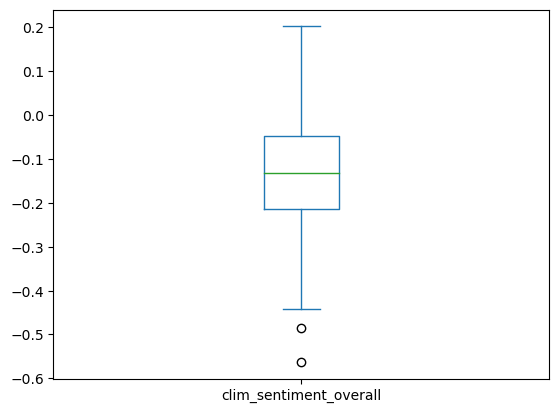

In [22]:
df_sentiment['clim_sentiment_overall'].plot.box()
plt.savefig('boxplot.png')

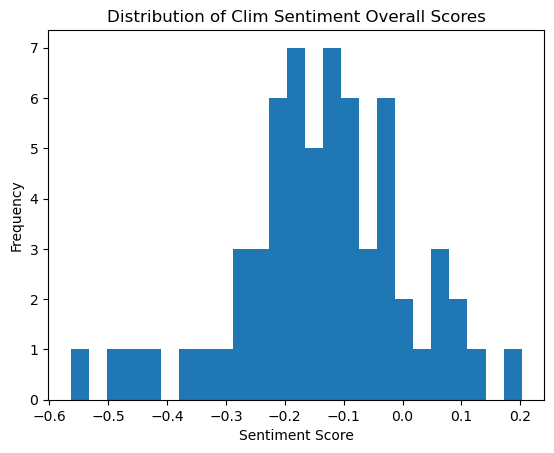

In [28]:
# Assuming your DataFrame is called 'df_sentiment'
df_sentiment['clim_sentiment_overall'].plot.hist(bins = 25)

# Set plot labels
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Clim Sentiment Overall Scores')

plt.savefig('sentimentdistribution.png')
# Show the histogram
plt.show()

In [63]:
df_sentiment['clim_sentiment_overall'].std()

0.1465126715228306

In [66]:
df_results_2 = df_sentiment[df_sentiment['clim_sentiment_overall']>0]
df_results_2 = df_results_2[['company','clim_sentiment_overall']]

In [67]:
print(df_results_2.to_latex(index = False, caption = 'Companies With a Sentiment Discrepancy Above 0', label = 'tab:greenwashcompanies', header = True, position = 'h'))

\begin{table}[h]
\centering
\caption{Companies With a Sentiment Discrepancy Above 0}
\label{tab:greenwashcompanies}
\begin{tabular}{lr}
\toprule
   company &  clim\_sentiment\_overall \\
\midrule
    google &                0.012438 \\
   chevron &                0.107853 \\
     exxon &                0.068282 \\
    danone &                0.126692 \\
 starbucks &                0.086163 \\
ford-motor &                0.055372 \\
     tesco &                0.038179 \\
 blackrock &                0.001474 \\
    dupont &                0.202174 \\
     apple &                0.052469 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\dathn\AppData\Local\Temp\ipykernel_3060\4142593002.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_results_2.to_latex(index = False, caption = 'Companies With a Sentiment Discrepancy Above 0', label = 'tab:greenwashcompanies', header = True, position = 'h'))


In [94]:
df_linreg['clim_sentiment_overall'].mean()

0.5537758492847364

In [17]:
df_linreg['discrepancy_index'] = MinMaxScaler().fit_transform(np.array(df_linreg['discrepancy_index']).reshape(-1,1))

In [18]:
df_linreg.set_index('company', inplace = True)

In [25]:
df_linreg

,ESG governance,Emission Reduction,Waste Management,Renewable Energy,Plastics Recyling,Electrical Vehicles,Climate Change,Nature Conservation,Sustainable Transportation,Sustainable Agriculure,...,5,6,7,8,10,11,20,25,average,dissimilarity
company,,,,,,,,,,,,,,,,,,,,,
rio-tinto,-0.103401,-0.118888,0.315222,-0.076896,0.623388,-0.104418,0.069384,0.360745,-0.046325,NaN,...,0.334281,0.483329,0.232824,0.408051,NaN,0.214380,0.179743,NaN,0.173357,0.826643
walmart,0.007098,0.063356,0.073705,-0.227604,0.030754,-0.283509,0.094747,0.065251,NaN,0.063302,...,0.182003,0.505852,0.475088,NaN,0.468949,0.243316,0.240421,NaN,0.643641,0.356359
colgate,0.114434,0.066575,-0.044937,-0.419891,0.065245,NaN,-0.005104,-0.015416,NaN,-0.323991,...,NaN,0.191898,0.245663,NaN,0.232664,NaN,0.332284,NaN,0.205470,0.794530
general-mills,-0.062815,0.007971,-0.185231,0.031976,-0.213897,NaN,0.264606,-0.249514,-0.884435,-0.139983,...,NaN,0.413579,0.391257,0.144090,0.506694,0.159895,0.554802,NaN,0.317077,0.682923
hp,-0.080099,-0.158046,-0.027431,0.018113,-0.037755,0.125385,0.041401,-0.157452,0.215793,-0.205014,...,0.467884,0.508401,0.404933,0.341146,0.166339,0.363206,0.189046,NaN,0.543057,0.456943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adidas,-0.003448,0.293583,0.098622,0.148214,-0.018610,-0.129327,0.029701,0.256966,NaN,NaN,...,0.094742,0.376804,0.321279,NaN,NaN,0.212580,0.260169,NaN,0.254580,0.745420
hyundai,0.042043,-0.102316,-0.034380,0.024789,0.216669,0.135543,-0.122541,-0.169336,0.205020,-0.912826,...,0.530615,0.330169,0.299412,0.569242,0.100385,0.275194,NaN,NaN,0.492684,0.507316
intel,0.125090,0.207181,-0.075009,0.134263,0.077224,0.261944,0.305286,0.153274,-0.133883,NaN,...,0.229873,0.454132,0.471610,0.374688,NaN,0.494387,0.330656,NaN,0.624501,0.375499


In [32]:
df_sentiment_total = pd.read_csv('sentiment_overall.csv')
df_sentiment_total[df_sentiment_total['company'] == 'rio-tinto']

,company,value
14,rio-tinto,-0.073053


In [51]:
df_similarity_total = pd.read_csv('similarity_overall.csv')

In [30]:
df_linreg = pd.merge(df_linreg, df_sentiment_total, how = 'left', left_on = df_linreg.index, right_on = 'company')

In [59]:
df_linreg = pd.merge(df_similarity_total, df_sample,  how = 'left')

In [60]:
df_linreg[df_linreg['dissimilarity_total'].isnull()]

,company,sim_score,dissimilarity_total,resource use,emissions,environmental innovation,strategy,average_practice,green_practice,green_communication,discrepancy_index


In [34]:
df_linreg[df_linreg['company'] =='rio-tinto']['discrepancy_index']

0    0.681803
Name: discrepancy_index, dtype: float64

In [64]:
df_linreg

,company,sim_score,dissimilarity_total,resource use,emissions,environmental innovation,strategy,average_practice,green_practice,green_communication,discrepancy_index
0,nextera,0.576124,0.423876,93.43,85.69,63.03,87.01,80.716667,-0.045445,0.061204,0.556465
1,chevron,0.781576,0.218424,74.35,86.22,79.38,93.33,79.983333,-0.106166,0.507573,0.625649
2,ralph-lauren,0.315532,0.684468,86.13,82.59,80.68,92.38,83.133333,0.154656,0.440476,0.580910
3,coca-cola,0.608070,0.391930,72.06,42.13,90.52,99.51,68.236667,-1.078796,0.944055,0.817897
4,mitsubishi,0.029763,0.970237,97.50,67.50,83.33,97.05,82.776667,0.125124,0.770310,0.629939
...,...,...,...,...,...,...,...,...,...,...,...
58,shell,0.481304,0.518696,95.39,97.45,79.38,97.68,90.740000,0.784492,0.814805,0.546050
59,tesla,0.545558,0.454442,56.51,68.65,86.92,78.64,70.693333,-0.875383,-0.529953,0.589042
60,totalenergies,0.305087,0.694913,93.91,98.47,79.38,98.13,90.586667,0.771796,0.846588,0.552119
61,colgate,0.510728,0.489272,99.24,93.57,90.48,97.08,94.430000,1.090026,0.772428,0.498584


In [29]:
df_linreg.index

Index(['rio-tinto', 'walmart', 'colgate', 'general-mills', 'hp', 'shell',
       'p&g', 'exxon', 'komatsu', 'bayer', 'inditex', 'google', 'diageo',
       'ibm', 'mcdonald', 'tesla', 'mercedes', 'toyota', 'sonoco', 'h&m',
       'totalenergies', 'chipotle', 'coca-cola', 'eversource', 'honda',
       'renault', 'citi', 'dell', 'beiersdorf', 'pepsico', 'airbus', 'henkel',
       'mitsubishi', 'ralph-lauren', 'dupont', 'tesco', 'hershey', 'nike',
       'boeing', 'abb', 'cemex', 'blackrock', 'ford-motor', 'danone', 'enel',
       'volvo', 'volkswagen', 'nestle', 'linde', 'edp', 'schneider-electric',
       'apple', 'mondelez', 'microsoft', 'nextera', 'veolia', 'chevron', 'dhl',
       'adidas', 'hyundai', 'intel', 'bmw', 'starbucks'],
      dtype='object', name='company')

In [39]:
X = df_linreg['value']
y = df_linreg['discrepancy_index']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      discrepancy_index   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.5653
Date:                Tue, 16 May 2023   Prob (F-statistic):              0.455
Time:                        21:24:18   Log-Likelihood:                 19.086
No. Observations:                  63   AIC:                            -34.17
Df Residuals:                      61   BIC:                            -29.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5379      0.023     23.363      0.0

In [65]:
X = df_linreg['dissimilarity_total']
y = df_linreg['discrepancy_index']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      discrepancy_index   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.5653
Date:                Tue, 16 May 2023   Prob (F-statistic):              0.455
Time:                        22:01:22   Log-Likelihood:                 19.086
No. Observations:                  63   AIC:                            -34.17
Df Residuals:                      61   BIC:                            -29.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5832    